<a href="https://colab.research.google.com/github/AliSiddique/torchdrug/blob/main/TorchDrug_Basic_Usage_and_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction

In this tutorial, we are going to introduce the basic usage of **TorchDrug**.

### Manual Steps

1.   Get your own copy of this file via "File > Save a copy in Drive...",
2.   Set the runtime to **GPU** via "Runtime > Change runtime type..."

### Colab Tutorials

#### Quick Start
1. [Basic Usage and Pipeline](https://colab.research.google.com/drive/1Tbnr1Fog_YjkqU1MOhcVLuxqZ4DC-c8-#forceEdit=true&sandboxMode=true)

#### Drug Discovery Tasks
1. [Property Prediction](https://colab.research.google.com/drive/1sb2w3evdEWm-GYo28RksvzJ74p63xHMn?usp=sharing#forceEdit=true&sandboxMode=true)
2. [Pretrained Molecular Representations](https://colab.research.google.com/drive/10faCIVIfln20f2h1oQk2UrXiAMqZKLoW?usp=sharing#forceEdit=true&sandboxMode=true)
3. [De Novo Molecule Design](https://colab.research.google.com/drive/1JEMiMvSBuqCuzzREYpviNZZRVOYsgivA?usp=sharing#forceEdit=true&sandboxMode=true)
4. [Retrosynthesis](https://colab.research.google.com/drive/1IH1hk7K3MaxAEe5m6CFY7Eyej3RuiEL1?usp=sharing#forceEdit=true&sandboxMode=true)
5. [Knowledge Graph Reasoning](https://colab.research.google.com/drive/1-sjqQZhYrGM0HiMuaqXOiqhDNlJi7g_I?usp=sharing#forceEdit=true&sandboxMode=true)

In [ ]:
import os
import torch
os.environ["TORCH_VERSION"] = torch.__version__

!pip install torch-scatter torch-cluster -f https://pytorch-geometric.com/whl/torch-$TORCH_VERSION.html
!pip install torchdrug
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://pytorch-geometric.com/whl/torch-1.12.1+cu113.html
     |████████████████████████████████| 7.9 MB 21.9 MB/s 
     |████████████████████████████████| 2.4 MB 58.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 267 kB 36.8 MB/s 
     |████████████████████████████████| 76 kB 5.7 MB/s 
     |████████████████████████████████| 29.5 MB 1.2 MB/s 
     |████████████████████████████████| 120 kB 70.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 32.9 MB/s 
     |████████████████████████████████| 182 kB 65.5 MB/s 
     |████████████████████████████████| 166 kB 72.7 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 166 kB 68.1

# Graphs
Graphs are the fundamental data structure used in TorchDrug. They can be viewed as a generalization of graph processing libraries (e.g., NetworkX) in a tensor framework, while enjoy the GPU acceleration and auto differentiation.

The following code shows how to create a cycle graph from an edge list. By default, the graph structure is stored as an edge list to save memory consumption. We can convert it to a dense adjacency matrix on the fly if needed.

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


22:30:31   NumExpr defaulting to 2 threads.
tensor([[0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0.]])


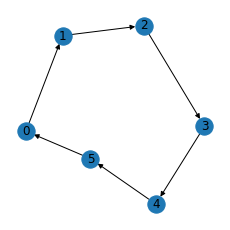

In [ ]:
import torchdrug as td
from torchdrug import data
%matplotlib inline

edge_list = [[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 0]]
graph = data.Graph(edge_list, num_node=6)
graph.visualize()
print(graph.adjacency.to_dense())

Graphs are defined with directed edges. To define an undirected graph, we can call the member function `Graph.undirected()` to get an undirected copy of the graph.

tensor([[0., 1., 0., 0., 0., 1.],
        [1., 0., 1., 0., 0., 0.],
        [0., 1., 0., 1., 0., 0.],
        [0., 0., 1., 0., 1., 0.],
        [0., 0., 0., 1., 0., 1.],
        [1., 0., 0., 0., 1., 0.]])


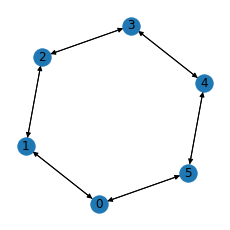

In [ ]:
graph = graph.undirected()
graph.visualize()
print(graph.adjacency.to_dense())

In some cases, we would like to specify a type for each edge in the graph. For example, we may need to represent the bond type in molecules, or the relations in biomedical knowledge graphs.

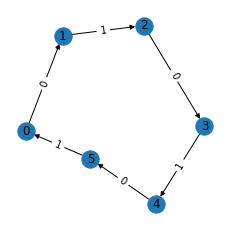

In [ ]:
edge_list = [[0, 1, 0], [1, 2, 1], [2, 3, 0], [3, 4, 1], [4, 5, 0], [5, 0, 1]]
graph = data.Graph(edge_list, num_node=6, num_relation=2)
graph.visualize()

# Molecules

A specfic instance of graphs in drug discovery is a molecule, which may have additional chemical constraints and features. For example, we can construct a molecule from SMILES string. SMILES is a language that describes complex molecule structures using a linear string.

The node and edge features may serve as input to machine learning models. We may specify different features by changing the arguments in `Molecule.from_smiles`.

Molecule(num_atom=16, num_bond=32)
torch.Size([16, 3])
torch.Size([32, 1])


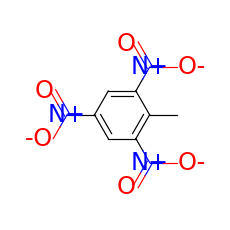

In [ ]:
smiles = "CC1=C(C=C(C=C1[N+](=O)[O-])[N+](=O)[O-])[N+](=O)[O-]"
mol = data.Molecule.from_smiles(smiles, atom_feature="position", bond_feature="length")
mol.visualize()
print(mol)
print(mol.node_feature.shape)
print(mol.edge_feature.shape)

The molecule data structure contains several common chemical properties. For example, we can visualize the formal charge of each atom in the molecule.

In [ ]:
for atom, charge in zip(mol.atom_type.tolist(), mol.formal_charge.tolist()):
    print("%s: %s" % (td.ATOM_SYMBOL[atom], charge))

C: 0
C: 0
C: 0
C: 0
C: 0
C: 0
C: 0
N: 1
O: 0
O: -1
N: 1
O: 0
O: -1
N: 1
O: 0
O: -1


# Knowledge Graphs

Another instance of graphs is a knowledge graph. Knowledge graphs represent biomedical knowledge as a relational graph, where each edge encodes a fact $<head, relation, tail>$.

Here we show an example of knowledge graphs with the dataset Hetionet. Hetionet has the following relations between entities.

<img src="https://het.io/about/metagraph.png" alt="Hetionet entity & relation types" width="400">

In [ ]:
from torchdrug import datasets

hetionet = datasets.Hetionet("~/knowledge-graph-datasets")
print(hetionet)

INFO:torchdrug.utils.file:Downloading https://www.dropbox.com/s/y47bt9oq57h6l5k/train.txt?dl=1 to /root/knowledge-graph-datasets/hetionet_train.txt


22:30:56   Downloading https://www.dropbox.com/s/y47bt9oq57h6l5k/train.txt?dl=1 to /root/knowledge-graph-datasets/hetionet_train.txt


INFO:torchdrug.utils.file:Downloading https://www.dropbox.com/s/a0pbrx9tz3dgsff/valid.txt?dl=1 to /root/knowledge-graph-datasets/hetionet_valid.txt


22:31:02   Downloading https://www.dropbox.com/s/a0pbrx9tz3dgsff/valid.txt?dl=1 to /root/knowledge-graph-datasets/hetionet_valid.txt


INFO:torchdrug.utils.file:Downloading https://www.dropbox.com/s/4dhrvg3fyq5tnu4/test.txt?dl=1 to /root/knowledge-graph-datasets/hetionet_test.txt


22:31:04   Downloading https://www.dropbox.com/s/4dhrvg3fyq5tnu4/test.txt?dl=1 to /root/knowledge-graph-datasets/hetionet_test.txt


Loading /root/knowledge-graph-datasets/hetionet_train.txt: 100%|██████████| 2025177/2025177 [00:07<00:00, 269857.85it/s]
Loading /root/knowledge-graph-datasets/hetionet_valid.txt: 100%|██████████| 112510/112510 [00:00<00:00, 557729.59it/s]
Loading /root/knowledge-graph-datasets/hetionet_test.txt: 100%|██████████| 112510/112510 [00:00<00:00, 534974.65it/s]


Hetionet(
  #entity: 45158
  #relation: 24
  #triplet: 2250197
)


We visualize a single edge from the knowledge graph. This edge encodes the fact that [gene 11344](https://www.ncbi.nlm.nih.gov/gene/11344) regulates [gene 7485](https://www.ncbi.nlm.nih.gov/gene/7485).

In [ ]:
kg = hetionet.graph
h, t, r = kg.edge_list[0]
print(hetionet.entity_vocab[h], hetionet.relation_vocab[r],
      hetionet.entity_vocab[t])

Gene::11344 Gr>G Gene::7485


# Graph Operations
A group of arbitrary graphs can also be processed as a batch to maximize the utilization of hardware. They can also be transferred between CPUs and GPUs using `cpu()` and `cuda()` methods.



PackedMolecule(batch_size=4, num_atoms=[12, 6, 14, 9], num_bonds=[22, 10, 30, 18])


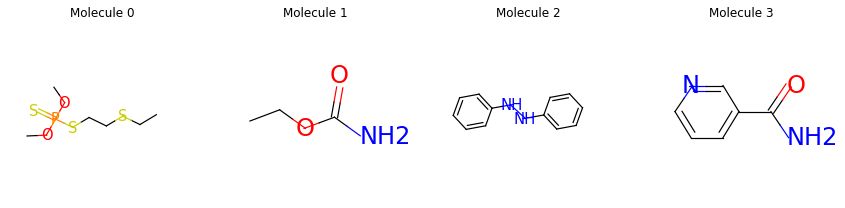

In [ ]:
smiles_list = ["CCSCCSP(=S)(OC)OC", "CCOC(=O)N",
               "N(Nc1ccccc1)c2ccccc2", "NC(=O)c1cccnc1"]
mols = data.PackedMolecule.from_smiles(smiles_list)
mols.visualize(num_row=1)
print(mols)

In [ ]:
mols = mols.cuda()
print(mols)

PackedMolecule(batch_size=4, num_atoms=[12, 6, 14, 9], num_bonds=[22, 10, 30, 18], device='cuda:0')


Just like original PyTorch tensors, a batch of graphs supports many common broadcast and indexing operations.

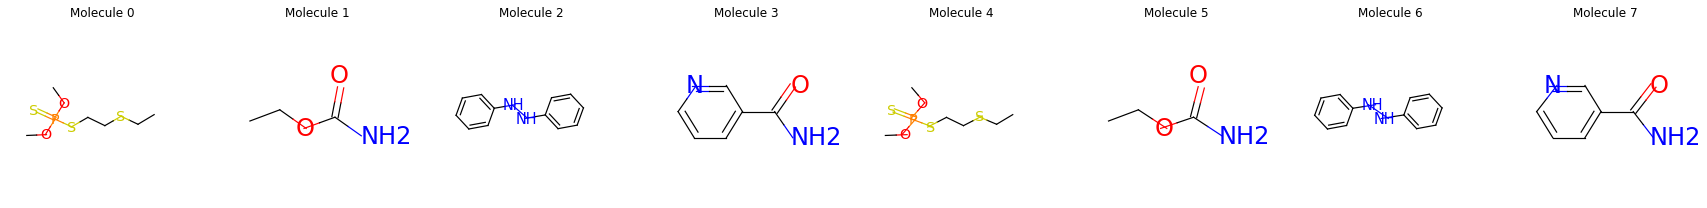

In [ ]:
mols = mols.repeat(2)
mols.visualize(num_row=1)

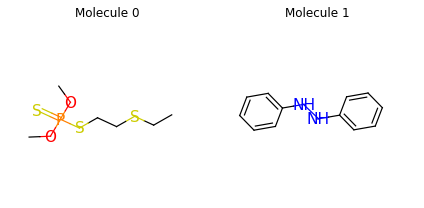

In [ ]:
mols = mols[[0, 2]]
mols.visualize()

Besides graph-level operations, there are also node-level and edge-level operations. The following example shows how to select edges that contain at least one carbon. This creates disconnected components in each molecule.



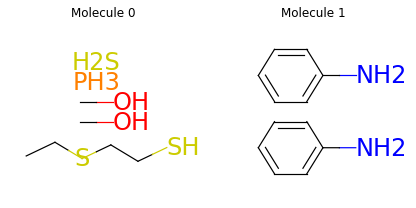

In [ ]:
node_in, node_out, bond_type = mols.edge_list.t()
edge_mask = (mols.atom_type[node_in] == td.CARBON) | \
            (mols.atom_type[node_out] == td.CARBON)
mols = mols.edge_mask(edge_mask)
mols.visualize()

We can further extract each single connected component as a separate molecule. This operation is commonly used in fragment-based drug discovery.

tensor([5, 2], device='cuda:0')
['CCSCCS', 'P', 'S', 'CO', 'CO', 'Nc1ccccc1', 'Nc1ccccc1']


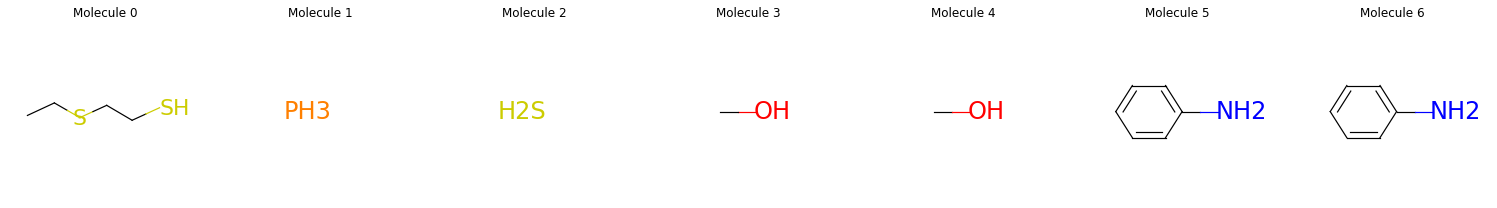

In [ ]:
mols, num_cc = mols.connected_components()
mols.visualize(num_row=1)
print(num_cc)
print(mols.to_smiles())

We may also retrieve specific edges from a graph. A typical usage of this operation is to search a knowledge graph for answering some queries.

Consider a query on Hetionet: *What are the symptoms that asthma presents?*

In [ ]:
asthma = hetionet.inv_entity_vocab["Disease::DOID:2841"]
presents = hetionet.inv_relation_vocab["DpS"]
any = -1

We can create a search pattern $<asthma, presents, ?>$, and search the knowledge graph with ``match()``.

In [ ]:
patterns = torch.tensor([[asthma, any, presents]])
edge_index, num_match = kg.match(patterns)
symptoms = kg.edge_list[edge_index, 1]
from pprint import pprint
pprint([hetionet.entity_vocab[s] for s in symptoms.tolist()])

/usr/local/lib/python3.7/dist-packages/torchdrug/data/graph.py:542: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  scale = scale[-1] // scale


['Symptom::D012135',
 'Symptom::D006935',
 'Symptom::D012913',
 'Symptom::D020078',
 'Symptom::D055154',
 'Symptom::D001049',
 'Symptom::D016857',
 'Symptom::D000472',
 'Symptom::D012893',
 'Symptom::D020181',
 'Symptom::D001724',
 'Symptom::D003490',
 'Symptom::D012912',
 'Symptom::D007040',
 'Symptom::D014832',
 'Symptom::D003371',
 'Symptom::D002637',
 'Symptom::D006685',
 'Symptom::D014202',
 'Symptom::D011602',
 'Symptom::D004417',
 'Symptom::D005311',
 'Symptom::D006985',
 'Symptom::D004418',
 'Symptom::D000860',
 'Symptom::D009058']


# Register Your Own Attributes

While the `Molecule` class comes with several chemical properties, we may also want to define our own properties. This only requires to wrap the attribute assignment lines with a context manager. The following example defines a custom node attribute to encode whether each node is connected to a carbon.

We can use `mol.edge()` and `mol.graph()` for node- and graph-level attributes respectively.


C: True
C: True
C: True
C: True
C: True
C: True
C: True
N: True
O: False
O: False
N: True
O: False
O: False
N: True
O: False
O: False


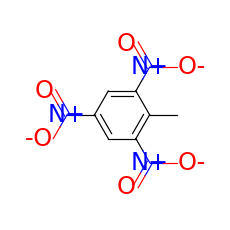

In [ ]:
from torch_scatter import scatter_add

smiles = "CC1=C(C=C(C=C1[N+](=O)[O-])[N+](=O)[O-])[N+](=O)[O-]"
mol = data.Molecule.from_smiles(smiles)
node_in, node_out = mol.edge_list.t()[:2]
attached_to_C = scatter_add(mol.atom_type[node_in] == td.CARBON, node_out, dim_size=mol.num_node)
mol.visualize()
with mol.node():
    mol.attached_to_C = attached_to_C
for atom, attach in zip(mol.atom_type.tolist(), mol.attached_to_C.tolist()):
    print("%s: %s" % (td.ATOM_SYMBOL[atom], attach))

The custom attributes are preserved in all graph operations. This behaves similarly as masking operations on PyTorch tensors.

N: True
O: False
O: False
N: True
O: False
O: False
N: True
O: False
O: False


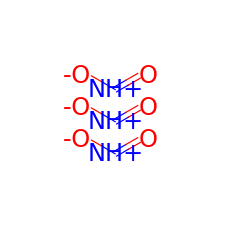

In [ ]:
mol = mol.subgraph(mol.atom_type != td.CARBON)
mol.visualize()
for atom, attach in zip(mol.atom_type.tolist(), mol.attached_to_C.tolist()):
    print("%s: %s" % (td.ATOM_SYMBOL[atom], attach))

# A Molecule Classifier
Now we demonstrate how to use TorchDrug to create a molecule classifier. Specifically, TorchDrug provides us with a large collection of popular datasets and models for drug discovery and graph representation learning. These help us avoid writing and debugging boilerplate code.

For this tutorial, we use the ClinTox dataset. This dataset requires to predict whether a molecule is toxic in clinical trials, and whether it is approved by FDA.

### Load and Prepare Dataset Splits
First of all, we load the dataset with TorchDrug. TorchDrug will automatically download the dataset into the path you specify.

We then split the dataset into train, validation and test, with a ratio of 8:1:1.

In [ ]:
import torch
from torch.nn import functional as F
from torchdrug import datasets

dataset = datasets.ClinTox("~/molecule-datasets/")
lengths = [int(0.8 * len(dataset)), int(0.1 * len(dataset))]
lengths += [len(dataset) - sum(lengths)]
train_set, valid_set, test_set = torch.utils.data.random_split(dataset, lengths)

INFO:torchdrug.utils.file:Downloading http://deepchem.io.s3-website-us-west-1.amazonaws.com/datasets/clintox.csv.gz to /root/molecule-datasets/clintox.csv.gz


22:31:22   Downloading http://deepchem.io.s3-website-us-west-1.amazonaws.com/datasets/clintox.csv.gz to /root/molecule-datasets/clintox.csv.gz


INFO:torchdrug.utils.file:Extracting /root/molecule-datasets/clintox.csv.gz to /root/molecule-datasets/clintox.csv


22:31:23   Extracting /root/molecule-datasets/clintox.csv.gz to /root/molecule-datasets/clintox.csv


Constructing molecules from SMILES:   0%|          | 0/1484 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torchdrug/data/feature.py:42: UserWarning: Unknown value `*`
  warnings.warn("Unknown value `%s`" % x)
/usr/local/lib/python3.7/dist-packages/torchdrug/data/feature.py:42: UserWarning: Unknown value `Tc`
  warnings.warn("Unknown value `%s`" % x)
/usr/local/lib/python3.7/dist-packages/torchdrug/data/feature.py:42: UserWarning: Unknown value `Fe`
  warnings.warn("Unknown value `%s`" % x)
/usr/local/lib/python3.7/dist-packages/torchdrug/data/feature.py:42: UserWarning: Unknown value `Al`
  warnings.warn("Unknown value `%s`" % x)
Constructing molecules from SMILES:   5%|▌         | 76/1484 [00:00<00:01, 753.87it/s]/usr/local/lib/python3.7/dist-packages/torchdrug/data/feature.py:42: UserWarning: Unknown value `Ca`
  warnings.warn("Unknown value `%s`" % x)
Constructing molecules from SMILES:  10%|█         | 152/1484 [00:00<00:02, 659.92it/s]/usr/local/lib/python3.7/dist-package

### Define a Graph Neural Network for Classification
We define a graph neural network to encode the molecule graphs. Specifically, we use the a Graph Isomorphism Network (GIN) with 4 hidden layers.

In [ ]:
from torchdrug import core, models, tasks

model = models.GIN(input_dim=dataset.node_feature_dim,
                   hidden_dims=[256, 256, 256, 256],
                   short_cut=True, batch_norm=True, concat_hidden=True)

Note the model is simply a neural network without any training target. To adapt it for classification, we wrap it with a property prediction module. We define the classification task by the binary cross entropy (BCE) criterion.

In [ ]:
task = tasks.PropertyPrediction(model, task=dataset.tasks,
                                criterion="bce", metric=("auprc", "auroc"))

### Train the Model
We create an optimizer for the parameters in the task, and combine everything into `core.Engine`. The engine provides convenient routines for training and test.



In [ ]:
optimizer = torch.optim.Adam(task.parameters(), lr=1e-4)
solver = core.Engine(task, train_set, valid_set, test_set, optimizer,
                     batch_size=1024, gpus=[0])
solver.train(num_epoch=100)

22:31:27   Preprocess training set


 'class': 'core.Engine',
 'gpus': [0],
 'gradient_interval': 1,
 'log_interval': 100,
 'logger': 'logging',
 'num_worker': 0,
 'optimizer': {'amsgrad': False,
               'betas': (0.9, 0.999),
               'capturable': False,
               'class': 'optim.Adam',
               'eps': 1e-08,
               'foreach': None,
               'lr': 0.0001,
               'maximize': False,
               'weight_decay': 0},
 'scheduler': None,
 'task': {'class': 'tasks.PropertyPrediction',
          'criterion': 'bce',
          'graph_construction_model': None,
          'metric': ('auprc', 'auroc'),
          'model': {'activation': 'relu',
                    'batch_norm': True,
                    'class': 'models.GIN',
                    'concat_hidden': True,
                    'edge_input_dim': None,
                    'eps': 0,
                    'hidden_dims': [256, 256, 256, 256],
                    'input_dim': 66,
                    'learn_eps': False,
             

22:31:27   {'batch_size': 1024,
 'class': 'core.Engine',
 'gpus': [0],
 'gradient_interval': 1,
 'log_interval': 100,
 'logger': 'logging',
 'num_worker': 0,
 'optimizer': {'amsgrad': False,
               'betas': (0.9, 0.999),
               'capturable': False,
               'class': 'optim.Adam',
               'eps': 1e-08,
               'foreach': None,
               'lr': 0.0001,
               'maximize': False,
               'weight_decay': 0},
 'scheduler': None,
 'task': {'class': 'tasks.PropertyPrediction',
          'criterion': 'bce',
          'graph_construction_model': None,
          'metric': ('auprc', 'auroc'),
          'model': {'activation': 'relu',
                    'batch_norm': True,
                    'class': 'models.GIN',
                    'concat_hidden': True,
                    'edge_input_dim': None,
                    'eps': 0,
                    'hidden_dims': [256, 256, 256, 256],
                    'input_dim': 66,
                    '

22:31:27   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:27   Epoch 0 begin


22:31:29   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:29   binary cross entropy: 21.9471


22:31:30   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:30   Epoch 0 end


22:31:30   duration: 2.67 secs


22:31:30   speed: 0.75 batch / sec


22:31:30   ETA: 4.40 mins


22:31:30   max GPU memory: 745.0 MiB


22:31:30   ------------------------------


22:31:30   average binary cross entropy: 20.0354


22:31:30   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:30   Epoch 1 begin


22:31:30   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:30   Epoch 1 end


22:31:30   duration: 0.25 secs


22:31:30   speed: 7.86 batch / sec


22:31:30   ETA: 2.38 mins


22:31:30   max GPU memory: 743.6 MiB


22:31:30   ------------------------------


22:31:30   average binary cross entropy: 16.9778


22:31:30   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:30   Epoch 2 begin


22:31:30   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:30   Epoch 2 end


22:31:30   duration: 0.25 secs


22:31:30   speed: 8.06 batch / sec


22:31:30   ETA: 1.71 mins


22:31:30   max GPU memory: 740.9 MiB


22:31:30   ------------------------------


22:31:30   average binary cross entropy: 13.852


22:31:30   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:30   Epoch 3 begin


22:31:30   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:30   Epoch 3 end


22:31:30   duration: 0.26 secs


22:31:30   speed: 7.75 batch / sec


22:31:30   ETA: 1.37 mins


22:31:30   max GPU memory: 746.9 MiB


22:31:30   ------------------------------


22:31:30   average binary cross entropy: 10.4199


22:31:30   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:30   Epoch 4 begin


22:31:31   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:31   Epoch 4 end


22:31:31   duration: 0.24 secs


22:31:31   speed: 8.16 batch / sec


22:31:31   ETA: 1.16 mins


22:31:31   max GPU memory: 741.6 MiB


22:31:31   ------------------------------


22:31:31   average binary cross entropy: 7.86903


22:31:31   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:31   Epoch 5 begin


22:31:31   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:31   Epoch 5 end


22:31:31   duration: 0.24 secs


22:31:31   speed: 8.29 batch / sec


22:31:31   ETA: 1.02 mins


22:31:31   max GPU memory: 738.8 MiB


22:31:31   ------------------------------


22:31:31   average binary cross entropy: 5.53164


22:31:31   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:31   Epoch 6 begin


22:31:31   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:31   Epoch 6 end


22:31:31   duration: 0.24 secs


22:31:31   speed: 8.32 batch / sec


22:31:31   ETA: 55.18 secs


22:31:31   max GPU memory: 750.7 MiB


22:31:31   ------------------------------


22:31:31   average binary cross entropy: 3.2325


22:31:31   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:31   Epoch 7 begin


22:31:31   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:31   Epoch 7 end


22:31:31   duration: 0.26 secs


22:31:31   speed: 7.70 batch / sec


22:31:31   ETA: 50.75 secs


22:31:31   max GPU memory: 742.3 MiB


22:31:31   ------------------------------


22:31:31   average binary cross entropy: 1.96525


22:31:31   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:31   Epoch 8 begin


22:31:32   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:32   Epoch 8 end


22:31:32   duration: 0.26 secs


22:31:32   speed: 7.82 batch / sec


22:31:32   ETA: 47.20 secs


22:31:32   max GPU memory: 744.0 MiB


22:31:32   ------------------------------


22:31:32   average binary cross entropy: 1.11744


22:31:32   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:32   Epoch 9 begin


22:31:32   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:32   Epoch 9 end


22:31:32   duration: 0.25 secs


22:31:32   speed: 8.04 batch / sec


22:31:32   ETA: 44.25 secs


22:31:32   max GPU memory: 733.0 MiB


22:31:32   ------------------------------


22:31:32   average binary cross entropy: 1.09372


22:31:32   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:32   Epoch 10 begin


22:31:32   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:32   Epoch 10 end


22:31:32   duration: 0.26 secs


22:31:32   speed: 7.73 batch / sec


22:31:32   ETA: 41.88 secs


22:31:32   max GPU memory: 744.2 MiB


22:31:32   ------------------------------


22:31:32   average binary cross entropy: 1.00741


22:31:32   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:32   Epoch 11 begin


22:31:32   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:32   Epoch 11 end


22:31:32   duration: 0.25 secs


22:31:32   speed: 7.87 batch / sec


22:31:32   ETA: 39.82 secs


22:31:32   max GPU memory: 748.2 MiB


22:31:32   ------------------------------


22:31:32   average binary cross entropy: 0.844599


22:31:32   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:32   Epoch 12 begin


22:31:33   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:33   Epoch 12 end


22:31:33   duration: 0.25 secs


22:31:33   speed: 8.08 batch / sec


22:31:33   ETA: 37.99 secs


22:31:33   max GPU memory: 744.5 MiB


22:31:33   ------------------------------


22:31:33   average binary cross entropy: 1.20518


22:31:33   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:33   Epoch 13 begin


22:31:33   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:33   Epoch 13 end


22:31:33   duration: 0.26 secs


22:31:33   speed: 7.73 batch / sec


22:31:33   ETA: 36.46 secs


22:31:33   max GPU memory: 747.9 MiB


22:31:33   ------------------------------


22:31:33   average binary cross entropy: 1.02333


22:31:33   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:33   Epoch 14 begin


22:31:33   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:33   Epoch 14 end


22:31:33   duration: 0.26 secs


22:31:33   speed: 7.74 batch / sec


22:31:33   ETA: 35.10 secs


22:31:33   max GPU memory: 741.0 MiB


22:31:33   ------------------------------


22:31:33   average binary cross entropy: 0.919667


22:31:33   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:33   Epoch 15 begin


22:31:33   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:33   Epoch 15 end


22:31:33   duration: 0.26 secs


22:31:33   speed: 7.82 batch / sec


22:31:33   ETA: 33.86 secs


22:31:33   max GPU memory: 735.5 MiB


22:31:33   ------------------------------


22:31:33   average binary cross entropy: 1.16368


22:31:33   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:33   Epoch 16 begin


22:31:34   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:34   Epoch 16 end


22:31:34   duration: 0.26 secs


22:31:34   speed: 7.78 batch / sec


22:31:34   ETA: 32.74 secs


22:31:34   max GPU memory: 736.6 MiB


22:31:34   ------------------------------


22:31:34   average binary cross entropy: 0.968409


22:31:34   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:34   Epoch 17 begin


22:31:34   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:34   Epoch 17 end


22:31:34   duration: 0.25 secs


22:31:34   speed: 7.85 batch / sec


22:31:34   ETA: 31.71 secs


22:31:34   max GPU memory: 741.8 MiB


22:31:34   ------------------------------


22:31:34   average binary cross entropy: 0.824889


22:31:34   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:34   Epoch 18 begin


22:31:34   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:34   Epoch 18 end


22:31:34   duration: 0.25 secs


22:31:34   speed: 7.88 batch / sec


22:31:34   ETA: 30.76 secs


22:31:34   max GPU memory: 741.5 MiB


22:31:34   ------------------------------


22:31:34   average binary cross entropy: 0.714003


22:31:34   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:34   Epoch 19 begin


22:31:34   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:34   Epoch 19 end


22:31:34   duration: 0.26 secs


22:31:34   speed: 7.56 batch / sec


22:31:34   ETA: 29.92 secs


22:31:34   max GPU memory: 738.3 MiB


22:31:34   ------------------------------


22:31:34   average binary cross entropy: 0.764962


22:31:34   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:34   Epoch 20 begin


22:31:35   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:35   Epoch 20 end


22:31:35   duration: 0.25 secs


22:31:35   speed: 8.15 batch / sec


22:31:35   ETA: 29.06 secs


22:31:35   max GPU memory: 743.2 MiB


22:31:35   ------------------------------


22:31:35   average binary cross entropy: 0.645829


22:31:35   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:35   Epoch 21 begin


22:31:35   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:35   Epoch 21 end


22:31:35   duration: 0.24 secs


22:31:35   speed: 8.18 batch / sec


22:31:35   ETA: 28.26 secs


22:31:35   max GPU memory: 742.3 MiB


22:31:35   ------------------------------


22:31:35   average binary cross entropy: 0.55404


22:31:35   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:35   Epoch 22 begin


22:31:35   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:35   Epoch 22 end


22:31:35   duration: 0.27 secs


22:31:35   speed: 7.54 batch / sec


22:31:35   ETA: 27.57 secs


22:31:35   max GPU memory: 743.0 MiB


22:31:35   ------------------------------


22:31:35   average binary cross entropy: 0.500773


22:31:35   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:35   Epoch 23 begin


22:31:35   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:35   Epoch 23 end


22:31:35   duration: 0.25 secs


22:31:35   speed: 7.90 batch / sec


22:31:35   ETA: 26.88 secs


22:31:35   max GPU memory: 744.8 MiB


22:31:35   ------------------------------


22:31:35   average binary cross entropy: 0.491562


22:31:35   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:35   Epoch 24 begin


22:31:36   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:36   Epoch 24 end


22:31:36   duration: 0.25 secs


22:31:36   speed: 8.05 batch / sec


22:31:36   ETA: 26.21 secs


22:31:36   max GPU memory: 739.3 MiB


22:31:36   ------------------------------


22:31:36   average binary cross entropy: 0.549532


22:31:36   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:36   Epoch 25 begin


22:31:36   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:36   Epoch 25 end


22:31:36   duration: 0.26 secs


22:31:36   speed: 7.65 batch / sec


22:31:36   ETA: 25.61 secs


22:31:36   max GPU memory: 747.7 MiB


22:31:36   ------------------------------


22:31:36   average binary cross entropy: 0.6275


22:31:36   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:36   Epoch 26 begin


22:31:36   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:36   Epoch 26 end


22:31:36   duration: 0.24 secs


22:31:36   speed: 8.18 batch / sec


22:31:36   ETA: 24.99 secs


22:31:36   max GPU memory: 745.6 MiB


22:31:36   ------------------------------


22:31:36   average binary cross entropy: 0.48934


22:31:36   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:36   Epoch 27 begin


22:31:36   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:36   Epoch 27 end


22:31:36   duration: 0.26 secs


22:31:36   speed: 7.56 batch / sec


22:31:36   ETA: 24.45 secs


22:31:36   max GPU memory: 747.9 MiB


22:31:36   ------------------------------


22:31:36   average binary cross entropy: 0.533599


22:31:36   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:36   Epoch 28 begin


22:31:37   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:37   Epoch 28 end


22:31:37   duration: 0.28 secs


22:31:37   speed: 7.17 batch / sec


22:31:37   ETA: 23.96 secs


22:31:37   max GPU memory: 747.5 MiB


22:31:37   ------------------------------


22:31:37   average binary cross entropy: 0.451033


22:31:37   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:37   Epoch 29 begin


22:31:37   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:37   Epoch 29 end


22:31:37   duration: 0.26 secs


22:31:37   speed: 7.83 batch / sec


22:31:37   ETA: 23.43 secs


22:31:37   max GPU memory: 743.8 MiB


22:31:37   ------------------------------


22:31:37   average binary cross entropy: 0.380993


22:31:37   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:37   Epoch 30 begin


22:31:37   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:37   Epoch 30 end


22:31:37   duration: 0.24 secs


22:31:37   speed: 8.36 batch / sec


22:31:37   ETA: 22.88 secs


22:31:37   max GPU memory: 747.0 MiB


22:31:37   ------------------------------


22:31:37   average binary cross entropy: 0.375137


22:31:37   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:37   Epoch 31 begin


22:31:37   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:37   Epoch 31 end


22:31:37   duration: 0.24 secs


22:31:37   speed: 8.23 batch / sec


22:31:37   ETA: 22.36 secs


22:31:37   max GPU memory: 739.5 MiB


22:31:37   ------------------------------


22:31:37   average binary cross entropy: 0.328497


22:31:37   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:37   Epoch 32 begin


22:31:38   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:38   Epoch 32 end


22:31:38   duration: 0.26 secs


22:31:38   speed: 7.75 batch / sec


22:31:38   ETA: 21.89 secs


22:31:38   max GPU memory: 748.8 MiB


22:31:38   ------------------------------


22:31:38   average binary cross entropy: 0.317812


22:31:38   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:38   Epoch 33 begin


22:31:38   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:38   Epoch 33 end


22:31:38   duration: 0.27 secs


22:31:38   speed: 7.47 batch / sec


22:31:38   ETA: 21.45 secs


22:31:38   max GPU memory: 740.9 MiB


22:31:38   ------------------------------


22:31:38   average binary cross entropy: 0.269998


22:31:38   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:38   Epoch 34 begin


22:31:38   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:38   Epoch 34 end


22:31:38   duration: 0.25 secs


22:31:38   speed: 7.87 batch / sec


22:31:38   ETA: 20.99 secs


22:31:38   max GPU memory: 736.3 MiB


22:31:38   ------------------------------


22:31:38   average binary cross entropy: 0.298488


22:31:38   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:38   Epoch 35 begin


22:31:38   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:38   Epoch 35 end


22:31:38   duration: 0.25 secs


22:31:38   speed: 8.02 batch / sec


22:31:38   ETA: 20.54 secs


22:31:38   max GPU memory: 740.9 MiB


22:31:38   ------------------------------


22:31:38   average binary cross entropy: 0.260633


22:31:38   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:38   Epoch 36 begin


22:31:39   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:39   Epoch 36 end


22:31:39   duration: 0.25 secs


22:31:39   speed: 8.08 batch / sec


22:31:39   ETA: 20.09 secs


22:31:39   max GPU memory: 740.7 MiB


22:31:39   ------------------------------


22:31:39   average binary cross entropy: 0.255537


22:31:39   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:39   Epoch 37 begin


22:31:39   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:39   Epoch 37 end


22:31:39   duration: 0.25 secs


22:31:39   speed: 7.99 batch / sec


22:31:39   ETA: 19.66 secs


22:31:39   max GPU memory: 736.2 MiB


22:31:39   ------------------------------


22:31:39   average binary cross entropy: 0.221288


22:31:39   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:39   Epoch 38 begin


22:31:39   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:39   Epoch 38 end


22:31:39   duration: 0.25 secs


22:31:39   speed: 7.91 batch / sec


22:31:39   ETA: 19.24 secs


22:31:39   max GPU memory: 740.6 MiB


22:31:39   ------------------------------


22:31:39   average binary cross entropy: 0.204296


22:31:39   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:39   Epoch 39 begin


22:31:39   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:39   Epoch 39 end


22:31:39   duration: 0.27 secs


22:31:39   speed: 7.43 batch / sec


22:31:39   ETA: 18.86 secs


22:31:39   max GPU memory: 738.0 MiB


22:31:39   ------------------------------


22:31:39   average binary cross entropy: 0.261139


22:31:39   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:39   Epoch 40 begin


22:31:40   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:40   Epoch 40 end


22:31:40   duration: 0.27 secs


22:31:40   speed: 7.39 batch / sec


22:31:40   ETA: 18.48 secs


22:31:40   max GPU memory: 738.0 MiB


22:31:40   ------------------------------


22:31:40   average binary cross entropy: 0.184315


22:31:40   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:40   Epoch 41 begin


22:31:40   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:40   Epoch 41 end


22:31:40   duration: 0.26 secs


22:31:40   speed: 7.55 batch / sec


22:31:40   ETA: 18.10 secs


22:31:40   max GPU memory: 739.3 MiB


22:31:40   ------------------------------


22:31:40   average binary cross entropy: 0.172265


22:31:40   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:40   Epoch 42 begin


22:31:40   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:40   Epoch 42 end


22:31:40   duration: 0.24 secs


22:31:40   speed: 8.24 batch / sec


22:31:40   ETA: 17.70 secs


22:31:40   max GPU memory: 744.6 MiB


22:31:40   ------------------------------


22:31:40   average binary cross entropy: 0.207896


22:31:40   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:40   Epoch 43 begin


22:31:40   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:40   Epoch 43 end


22:31:40   duration: 0.25 secs


22:31:40   speed: 7.91 batch / sec


22:31:40   ETA: 17.31 secs


22:31:40   max GPU memory: 734.1 MiB


22:31:40   ------------------------------


22:31:40   average binary cross entropy: 0.188003


22:31:40   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:40   Epoch 44 begin


22:31:41   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:41   Epoch 44 end


22:31:41   duration: 0.25 secs


22:31:41   speed: 8.03 batch / sec


22:31:41   ETA: 16.93 secs


22:31:41   max GPU memory: 739.4 MiB


22:31:41   ------------------------------


22:31:41   average binary cross entropy: 0.218984


22:31:41   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:41   Epoch 45 begin


22:31:41   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:41   Epoch 45 end


22:31:41   duration: 0.25 secs


22:31:41   speed: 7.86 batch / sec


22:31:41   ETA: 16.56 secs


22:31:41   max GPU memory: 751.4 MiB


22:31:41   ------------------------------


22:31:41   average binary cross entropy: 0.161523


22:31:41   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:41   Epoch 46 begin


22:31:41   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:41   Epoch 46 end


22:31:41   duration: 0.26 secs


22:31:41   speed: 7.77 batch / sec


22:31:41   ETA: 16.20 secs


22:31:41   max GPU memory: 754.7 MiB


22:31:41   ------------------------------


22:31:41   average binary cross entropy: 0.182061


22:31:41   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:41   Epoch 47 begin


22:31:41   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:41   Epoch 47 end


22:31:41   duration: 0.25 secs


22:31:41   speed: 7.97 batch / sec


22:31:41   ETA: 15.83 secs


22:31:41   max GPU memory: 743.2 MiB


22:31:41   ------------------------------


22:31:41   average binary cross entropy: 0.179598


22:31:42   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:42   Epoch 48 begin


22:31:42   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:42   Epoch 48 end


22:31:42   duration: 0.24 secs


22:31:42   speed: 8.16 batch / sec


22:31:42   ETA: 15.47 secs


22:31:42   max GPU memory: 742.0 MiB


22:31:42   ------------------------------


22:31:42   average binary cross entropy: 0.162731


22:31:42   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:42   Epoch 49 begin


22:31:42   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:42   Epoch 49 end


22:31:42   duration: 0.25 secs


22:31:42   speed: 7.88 batch / sec


22:31:42   ETA: 15.11 secs


22:31:42   max GPU memory: 731.2 MiB


22:31:42   ------------------------------


22:31:42   average binary cross entropy: 0.186878


22:31:42   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:42   Epoch 50 begin


22:31:42   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:42   binary cross entropy: 0.142723


22:31:42   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:42   Epoch 50 end


22:31:42   duration: 0.27 secs


22:31:42   speed: 7.33 batch / sec


22:31:42   ETA: 14.78 secs


22:31:42   max GPU memory: 742.8 MiB


22:31:42   ------------------------------


22:31:42   average binary cross entropy: 0.182545


22:31:42   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:42   Epoch 51 begin


22:31:43   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:43   Epoch 51 end


22:31:43   duration: 0.28 secs


22:31:43   speed: 7.16 batch / sec


22:31:43   ETA: 14.46 secs


22:31:43   max GPU memory: 739.0 MiB


22:31:43   ------------------------------


22:31:43   average binary cross entropy: 0.14841


22:31:43   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:43   Epoch 52 begin


22:31:43   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:43   Epoch 52 end


22:31:43   duration: 0.26 secs


22:31:43   speed: 7.56 batch / sec


22:31:43   ETA: 14.13 secs


22:31:43   max GPU memory: 747.9 MiB


22:31:43   ------------------------------


22:31:43   average binary cross entropy: 0.141871


22:31:43   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:43   Epoch 53 begin


22:31:43   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:43   Epoch 53 end


22:31:43   duration: 0.26 secs


22:31:43   speed: 7.56 batch / sec


22:31:43   ETA: 13.80 secs


22:31:43   max GPU memory: 736.3 MiB


22:31:43   ------------------------------


22:31:43   average binary cross entropy: 0.146119


22:31:43   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:43   Epoch 54 begin


22:31:43   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:43   Epoch 54 end


22:31:43   duration: 0.28 secs


22:31:43   speed: 7.19 batch / sec


22:31:43   ETA: 13.48 secs


22:31:43   max GPU memory: 748.5 MiB


22:31:43   ------------------------------


22:31:43   average binary cross entropy: 0.142184


22:31:43   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:43   Epoch 55 begin


22:31:44   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:44   Epoch 55 end


22:31:44   duration: 0.27 secs


22:31:44   speed: 7.51 batch / sec


22:31:44   ETA: 13.15 secs


22:31:44   max GPU memory: 737.1 MiB


22:31:44   ------------------------------


22:31:44   average binary cross entropy: 0.165454


22:31:44   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:44   Epoch 56 begin


22:31:44   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:44   Epoch 56 end


22:31:44   duration: 0.26 secs


22:31:44   speed: 7.70 batch / sec


22:31:44   ETA: 12.82 secs


22:31:44   max GPU memory: 743.2 MiB


22:31:44   ------------------------------


22:31:44   average binary cross entropy: 0.130439


22:31:44   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:44   Epoch 57 begin


22:31:44   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:44   Epoch 57 end


22:31:44   duration: 0.26 secs


22:31:44   speed: 7.72 batch / sec


22:31:44   ETA: 12.50 secs


22:31:44   max GPU memory: 743.4 MiB


22:31:44   ------------------------------


22:31:44   average binary cross entropy: 0.166447


22:31:44   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:44   Epoch 58 begin


22:31:44   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:44   Epoch 58 end


22:31:44   duration: 0.25 secs


22:31:44   speed: 8.12 batch / sec


22:31:44   ETA: 12.16 secs


22:31:44   max GPU memory: 745.3 MiB


22:31:44   ------------------------------


22:31:44   average binary cross entropy: 0.121362


22:31:44   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:44   Epoch 59 begin


22:31:45   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:45   Epoch 59 end


22:31:45   duration: 0.25 secs


22:31:45   speed: 8.03 batch / sec


22:31:45   ETA: 11.84 secs


22:31:45   max GPU memory: 731.8 MiB


22:31:45   ------------------------------


22:31:45   average binary cross entropy: 0.147492


22:31:45   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:45   Epoch 60 begin


22:31:45   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:45   Epoch 60 end


22:31:45   duration: 0.25 secs


22:31:45   speed: 7.85 batch / sec


22:31:45   ETA: 11.51 secs


22:31:45   max GPU memory: 739.7 MiB


22:31:45   ------------------------------


22:31:45   average binary cross entropy: 0.109276


22:31:45   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:45   Epoch 61 begin


22:31:45   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:45   Epoch 61 end


22:31:45   duration: 0.24 secs


22:31:45   speed: 8.21 batch / sec


22:31:45   ETA: 11.19 secs


22:31:45   max GPU memory: 744.0 MiB


22:31:45   ------------------------------


22:31:45   average binary cross entropy: 0.109742


22:31:45   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:45   Epoch 62 begin


22:31:45   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:45   Epoch 62 end


22:31:45   duration: 0.25 secs


22:31:45   speed: 8.04 batch / sec


22:31:45   ETA: 10.87 secs


22:31:45   max GPU memory: 746.8 MiB


22:31:45   ------------------------------


22:31:45   average binary cross entropy: 0.106155


22:31:45   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:45   Epoch 63 begin


22:31:46   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:46   Epoch 63 end


22:31:46   duration: 0.26 secs


22:31:46   speed: 7.79 batch / sec


22:31:46   ETA: 10.55 secs


22:31:46   max GPU memory: 744.6 MiB


22:31:46   ------------------------------


22:31:46   average binary cross entropy: 0.114604


22:31:46   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:46   Epoch 64 begin


22:31:46   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:46   Epoch 64 end


22:31:46   duration: 0.27 secs


22:31:46   speed: 7.51 batch / sec


22:31:46   ETA: 10.24 secs


22:31:46   max GPU memory: 748.5 MiB


22:31:46   ------------------------------


22:31:46   average binary cross entropy: 0.11253


22:31:46   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:46   Epoch 65 begin


22:31:46   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:46   Epoch 65 end


22:31:46   duration: 0.24 secs


22:31:46   speed: 8.22 batch / sec


22:31:46   ETA: 9.93 secs


22:31:46   max GPU memory: 744.1 MiB


22:31:46   ------------------------------


22:31:46   average binary cross entropy: 0.116186


22:31:46   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:46   Epoch 66 begin


22:31:46   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:46   Epoch 66 end


22:31:46   duration: 0.25 secs


22:31:46   speed: 8.08 batch / sec


22:31:46   ETA: 9.61 secs


22:31:46   max GPU memory: 748.0 MiB


22:31:46   ------------------------------


22:31:46   average binary cross entropy: 0.112114


22:31:46   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:46   Epoch 67 begin


22:31:47   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:47   Epoch 67 end


22:31:47   duration: 0.26 secs


22:31:47   speed: 7.80 batch / sec


22:31:47   ETA: 9.30 secs


22:31:47   max GPU memory: 738.4 MiB


22:31:47   ------------------------------


22:31:47   average binary cross entropy: 0.124314


22:31:47   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:47   Epoch 68 begin


22:31:47   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:47   Epoch 68 end


22:31:47   duration: 0.25 secs


22:31:47   speed: 7.93 batch / sec


22:31:47   ETA: 9.00 secs


22:31:47   max GPU memory: 746.8 MiB


22:31:47   ------------------------------


22:31:47   average binary cross entropy: 0.121547


22:31:47   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:47   Epoch 69 begin


22:31:47   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:47   Epoch 69 end


22:31:47   duration: 0.24 secs


22:31:47   speed: 8.17 batch / sec


22:31:47   ETA: 8.69 secs


22:31:47   max GPU memory: 747.8 MiB


22:31:47   ------------------------------


22:31:47   average binary cross entropy: 0.146147


22:31:47   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:47   Epoch 70 begin


22:31:47   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:47   Epoch 70 end


22:31:47   duration: 0.25 secs


22:31:47   speed: 8.12 batch / sec


22:31:47   ETA: 8.38 secs


22:31:47   max GPU memory: 738.6 MiB


22:31:47   ------------------------------


22:31:47   average binary cross entropy: 0.10969


22:31:47   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:47   Epoch 71 begin


22:31:48   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:48   Epoch 71 end


22:31:48   duration: 0.37 secs


22:31:48   speed: 5.44 batch / sec


22:31:48   ETA: 8.12 secs


22:31:48   max GPU memory: 743.2 MiB


22:31:48   ------------------------------


22:31:48   average binary cross entropy: 0.116945


22:31:48   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:48   Epoch 72 begin


22:31:48   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:48   Epoch 72 end


22:31:48   duration: 0.24 secs


22:31:48   speed: 8.18 batch / sec


22:31:48   ETA: 7.81 secs


22:31:48   max GPU memory: 747.3 MiB


22:31:48   ------------------------------


22:31:48   average binary cross entropy: 0.101346


22:31:48   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:48   Epoch 73 begin


22:31:48   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:48   Epoch 73 end


22:31:48   duration: 0.24 secs


22:31:48   speed: 8.30 batch / sec


22:31:48   ETA: 7.51 secs


22:31:48   max GPU memory: 737.0 MiB


22:31:48   ------------------------------


22:31:48   average binary cross entropy: 0.0954248


22:31:48   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:48   Epoch 74 begin


22:31:48   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:48   Epoch 74 end


22:31:48   duration: 0.24 secs


22:31:48   speed: 8.21 batch / sec


22:31:48   ETA: 7.20 secs


22:31:48   max GPU memory: 737.4 MiB


22:31:48   ------------------------------


22:31:48   average binary cross entropy: 0.0972524


22:31:48   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:48   Epoch 75 begin


22:31:49   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:49   Epoch 75 end


22:31:49   duration: 0.25 secs


22:31:49   speed: 7.97 batch / sec


22:31:49   ETA: 6.90 secs


22:31:49   max GPU memory: 736.8 MiB


22:31:49   ------------------------------


22:31:49   average binary cross entropy: 0.11359


22:31:49   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:49   Epoch 76 begin


22:31:49   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:49   Epoch 76 end


22:31:49   duration: 0.25 secs


22:31:49   speed: 8.04 batch / sec


22:31:49   ETA: 6.60 secs


22:31:49   max GPU memory: 735.4 MiB


22:31:49   ------------------------------


22:31:49   average binary cross entropy: 0.113505


22:31:49   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:49   Epoch 77 begin


22:31:49   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:49   Epoch 77 end


22:31:49   duration: 0.26 secs


22:31:49   speed: 7.72 batch / sec


22:31:49   ETA: 6.31 secs


22:31:49   max GPU memory: 748.8 MiB


22:31:49   ------------------------------


22:31:49   average binary cross entropy: 0.106845


22:31:49   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:49   Epoch 78 begin


22:31:49   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:49   Epoch 78 end


22:31:49   duration: 0.25 secs


22:31:49   speed: 8.05 batch / sec


22:31:49   ETA: 6.01 secs


22:31:49   max GPU memory: 743.5 MiB


22:31:50   ------------------------------


22:31:50   average binary cross entropy: 0.132801


22:31:50   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:50   Epoch 79 begin


22:31:50   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:50   Epoch 79 end


22:31:50   duration: 0.25 secs


22:31:50   speed: 8.08 batch / sec


22:31:50   ETA: 5.72 secs


22:31:50   max GPU memory: 739.6 MiB


22:31:50   ------------------------------


22:31:50   average binary cross entropy: 0.148282


22:31:50   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:50   Epoch 80 begin


22:31:50   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:50   Epoch 80 end


22:31:50   duration: 0.27 secs


22:31:50   speed: 7.53 batch / sec


22:31:50   ETA: 5.43 secs


22:31:50   max GPU memory: 748.1 MiB


22:31:50   ------------------------------


22:31:50   average binary cross entropy: 0.145475


22:31:50   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:50   Epoch 81 begin


22:31:50   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:50   Epoch 81 end


22:31:50   duration: 0.24 secs


22:31:50   speed: 8.31 batch / sec


22:31:50   ETA: 5.13 secs


22:31:50   max GPU memory: 737.5 MiB


22:31:50   ------------------------------


22:31:50   average binary cross entropy: 0.0977952


22:31:50   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:50   Epoch 82 begin


22:31:50   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:50   Epoch 82 end


22:31:50   duration: 0.24 secs


22:31:50   speed: 8.34 batch / sec


22:31:50   ETA: 4.84 secs


22:31:50   max GPU memory: 739.2 MiB


22:31:50   ------------------------------


22:31:50   average binary cross entropy: 0.0904744


22:31:50   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:50   Epoch 83 begin


22:31:51   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:51   Epoch 83 end


22:31:51   duration: 0.26 secs


22:31:51   speed: 7.81 batch / sec


22:31:51   ETA: 4.55 secs


22:31:51   max GPU memory: 748.2 MiB


22:31:51   ------------------------------


22:31:51   average binary cross entropy: 0.0931226


22:31:51   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:51   Epoch 84 begin


22:31:51   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:51   Epoch 84 end


22:31:51   duration: 0.26 secs


22:31:51   speed: 7.78 batch / sec


22:31:51   ETA: 4.26 secs


22:31:51   max GPU memory: 738.2 MiB


22:31:51   ------------------------------


22:31:51   average binary cross entropy: 0.0862996


22:31:51   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:51   Epoch 85 begin


22:31:51   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:51   Epoch 85 end


22:31:51   duration: 0.24 secs


22:31:51   speed: 8.24 batch / sec


22:31:51   ETA: 3.97 secs


22:31:51   max GPU memory: 738.1 MiB


22:31:51   ------------------------------


22:31:51   average binary cross entropy: 0.113251


22:31:51   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:51   Epoch 86 begin


22:31:51   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:51   Epoch 86 end


22:31:51   duration: 0.24 secs


22:31:51   speed: 8.18 batch / sec


22:31:51   ETA: 3.68 secs


22:31:51   max GPU memory: 743.5 MiB


22:31:51   ------------------------------


22:31:51   average binary cross entropy: 0.0875553


22:31:51   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:51   Epoch 87 begin


22:31:52   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:52   Epoch 87 end


22:31:52   duration: 0.25 secs


22:31:52   speed: 7.98 batch / sec


22:31:52   ETA: 3.39 secs


22:31:52   max GPU memory: 742.6 MiB


22:31:52   ------------------------------


22:31:52   average binary cross entropy: 0.0902114


22:31:52   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:52   Epoch 88 begin


22:31:52   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:52   Epoch 88 end


22:31:52   duration: 0.26 secs


22:31:52   speed: 7.71 batch / sec


22:31:52   ETA: 3.11 secs


22:31:52   max GPU memory: 742.0 MiB


22:31:52   ------------------------------


22:31:52   average binary cross entropy: 0.0880755


22:31:52   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:52   Epoch 89 begin


22:31:52   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:52   Epoch 89 end


22:31:52   duration: 0.25 secs


22:31:52   speed: 8.09 batch / sec


22:31:52   ETA: 2.82 secs


22:31:52   max GPU memory: 748.8 MiB


22:31:52   ------------------------------


22:31:52   average binary cross entropy: 0.0880265


22:31:52   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:52   Epoch 90 begin


22:31:52   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:52   Epoch 90 end


22:31:52   duration: 0.25 secs


22:31:52   speed: 8.09 batch / sec


22:31:52   ETA: 2.53 secs


22:31:52   max GPU memory: 722.9 MiB


22:31:52   ------------------------------


22:31:53   average binary cross entropy: 0.0954622


22:31:53   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:53   Epoch 91 begin


22:31:53   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:53   Epoch 91 end


22:31:53   duration: 0.24 secs


22:31:53   speed: 8.24 batch / sec


22:31:53   ETA: 2.25 secs


22:31:53   max GPU memory: 738.6 MiB


22:31:53   ------------------------------


22:31:53   average binary cross entropy: 0.0765667


22:31:53   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:53   Epoch 92 begin


22:31:53   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:53   Epoch 92 end


22:31:53   duration: 0.25 secs


22:31:53   speed: 8.05 batch / sec


22:31:53   ETA: 1.97 secs


22:31:53   max GPU memory: 744.4 MiB


22:31:53   ------------------------------


22:31:53   average binary cross entropy: 0.0932469


22:31:53   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:53   Epoch 93 begin


22:31:53   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:53   Epoch 93 end


22:31:53   duration: 0.25 secs


22:31:53   speed: 7.85 batch / sec


22:31:53   ETA: 1.68 secs


22:31:53   max GPU memory: 752.7 MiB


22:31:53   ------------------------------


22:31:53   average binary cross entropy: 0.0773375


22:31:53   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:53   Epoch 94 begin


22:31:53   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:53   Epoch 94 end


22:31:53   duration: 0.26 secs


22:31:53   speed: 7.79 batch / sec


22:31:53   ETA: 1.40 secs


22:31:53   max GPU memory: 737.8 MiB


22:31:54   ------------------------------


22:31:54   average binary cross entropy: 0.110744


22:31:54   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:54   Epoch 95 begin


22:31:54   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:54   Epoch 95 end


22:31:54   duration: 0.26 secs


22:31:54   speed: 7.75 batch / sec


22:31:54   ETA: 1.12 secs


22:31:54   max GPU memory: 735.9 MiB


22:31:54   ------------------------------


22:31:54   average binary cross entropy: 0.0908031


22:31:54   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:54   Epoch 96 begin


22:31:54   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:54   Epoch 96 end


22:31:54   duration: 0.25 secs


22:31:54   speed: 8.00 batch / sec


22:31:54   ETA: 0.84 secs


22:31:54   max GPU memory: 742.2 MiB


22:31:54   ------------------------------


22:31:54   average binary cross entropy: 0.0872605


22:31:54   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:54   Epoch 97 begin


22:31:54   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:54   Epoch 97 end


22:31:54   duration: 0.27 secs


22:31:54   speed: 7.37 batch / sec


22:31:54   ETA: 0.56 secs


22:31:54   max GPU memory: 729.8 MiB


22:31:54   ------------------------------


22:31:54   average binary cross entropy: 0.0817527


22:31:54   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:54   Epoch 98 begin


22:31:55   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:55   Epoch 98 end


22:31:55   duration: 0.28 secs


22:31:55   speed: 7.14 batch / sec


22:31:55   ETA: 0.28 secs


22:31:55   max GPU memory: 738.9 MiB


22:31:55   ------------------------------


22:31:55   average binary cross entropy: 0.0861382


22:31:55   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:55   Epoch 99 begin


22:31:55   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:55   Epoch 99 end


22:31:55   duration: 0.26 secs


22:31:55   speed: 7.72 batch / sec


22:31:55   ETA: 0.00 secs


22:31:55   max GPU memory: 744.2 MiB


22:31:55   ------------------------------


22:31:55   average binary cross entropy: 0.0940764


We can log the training progress to W&B platform with a simple argument. Note this requires you to have a W&B account.

In [ ]:
# solver = core.Engine(task, train_set, valid_set, test_set, optimizer,
#                      batch_size=1024, gpus=[0], logger="wandb")

The output in our W&B console may look like follows.

![wandb_demo.png](https://raw.githubusercontent.com/DeepGraphLearning/torchdrug/master/asset/model/wandb_demo.png)

### Test the Model
To test the model on validation set, it only takes one line.

In [ ]:
solver.evaluate("valid")

22:31:55   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


22:31:55   Evaluate on valid


22:31:55   ------------------------------


22:31:55   auprc [CT_TOX]: 0.373957


22:31:55   auprc [FDA_APPROVED]: 0.991254


22:31:55   auroc [CT_TOX]: 0.835821


22:31:55   auroc [FDA_APPROVED]: 0.888321


{'auprc [FDA_APPROVED]': tensor(0.9913, device='cuda:0'),
 'auprc [CT_TOX]': tensor(0.3740, device='cuda:0'),
 'auroc [FDA_APPROVED]': tensor(0.8883, device='cuda:0'),
 'auroc [CT_TOX]': tensor(0.8358, device='cuda:0')}

Alternatively, we can make prediction on arbitrary input batches. The following code shows the prediction for the first 8 samples in the validation set.



/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


FDA_APPROVED: tensor([0.8580, 1.0000, 0.9749, 0.9999, 0.9996, 1.0000, 1.0000, 1.0000],
       device='cuda:0', grad_fn=<UnbindBackward0>)
CT_TOX: tensor([1.7450e-02, 1.6434e-05, 2.4531e-01, 5.5848e-06, 3.5647e-06, 2.1318e-03,
        2.3492e-13, 2.2680e-16], device='cuda:0', grad_fn=<UnbindBackward0>)


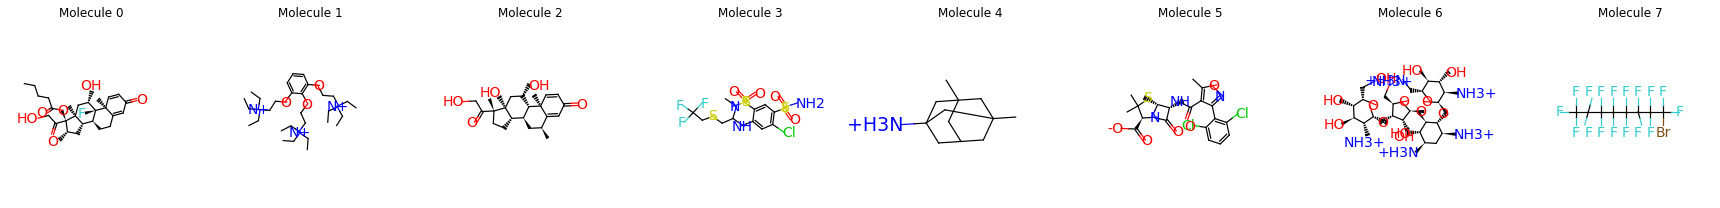

In [ ]:
from torchdrug import utils

batch = data.graph_collate(valid_set[:8])
batch["graph"].visualize(num_row=1)
batch = utils.cuda(batch, device=solver.device)
pred = F.sigmoid(task.predict(batch))
for t, p in zip(task.task, pred.t()):
    print("%s: %s" % (t, p))